In [ ]:
import pandas as pd
from sklearn.svm import SVC

# Loading the dataset
file_path = "crop_recommendation.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Check the structure of the dataset
print(df.info())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [ ]:
import pandas as pd

# Basic statistics for numerical variables
numerical_stats = df.describe()

print("Basic Statistics for Numerical Variables:")
print(numerical_stats)


Basic Statistics for Numerical Variables:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091 

In [ ]:
print(df.columns)


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [ ]:
# Calculate the variance for each column
variance = df.var()

# Print the variance for each column
print("Variance for each column:")
print(variance)


Variance for each column:
N              1362.889537
P              1088.068460
K              2565.212869
temperature      25.641550
humidity        495.677307
ph                0.598980
rainfall       3020.424469
dtype: float64


<ipython-input-5-a712d4ac8729>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = df.var()


<ipython-input-6-8efb58261e10>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


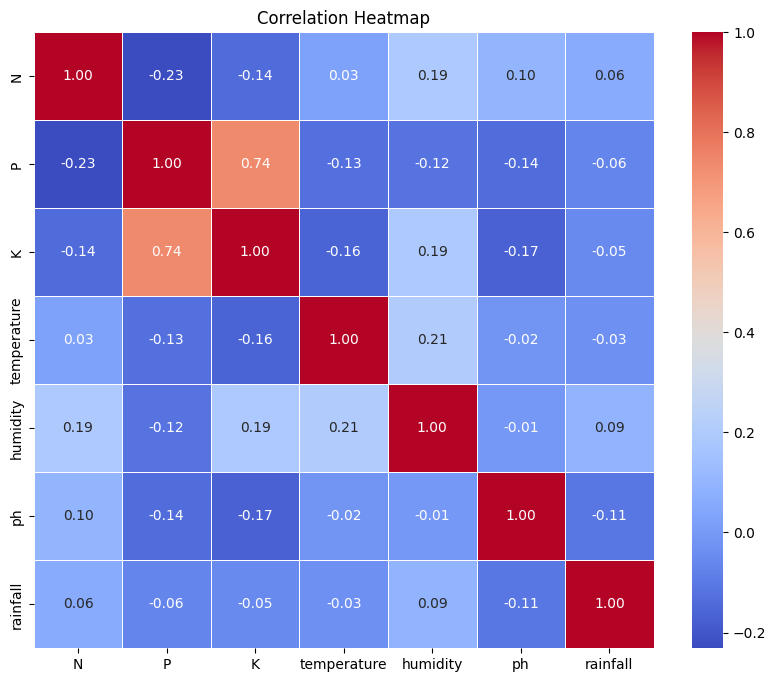

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')  # Save the figure as PNG file
plt.show()


In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(columns=[ 'label'])
y = df['label']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=32)

In [ ]:
# Initialize and fit SVM model
svm = SVC(kernel='linear', C=100.0)
svm.fit(X_train, y_train)

# Predict the target variable for test data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9803030303030303


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=32)
rf_classifier.fit(X_train, y_train)

# Predict the target variable for test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.9924242424242424


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and fit Gradient Boosting model
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict the target variable for test data
y_pred_gb = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)


Gradient Boosting Accuracy: 0.9833333333333333
